In [32]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import openpyxl as xl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import warnings
warnings.filterwarnings("ignore")

# Verileri Düzenleme için Kalıplar

In [33]:
economic_units = ['Briket','Briket Fabrikaları ','Diğer  Sektörler', 'Diğer Sektörler','DİĞER SEKTÖRLER','ENERJİ DIŞI TÜKETİM',
                  'Elektrik Santralları', 'Elektrik Santralları ', 'Elektrik Santralleri', 'Elektrik ve Isı Üretimi4', 'Elektrik Üretimi', 'Enerji Dışı', 'Enerji Dışı Kullanım',
                  'Hava Gazı Fab.    ', 'Havagazı Fabrikaları', 'Isı Üretimi', 'Isı Üretimi6', 'Kok Fabrikaları', 'Kok Fabrikaları    ', 'Kok Fırınları', 'Kombine Isı Santralleri',
                  'Konut ', 'Konut ve Hizmetler', 'Petrol Rafinerileri', 'Petrol Rafinerileri ', 'SANAYİ TÜKETİMİ', 'SEKTÖRLER TOPLAMI',
                  'Sanayi Tüketimi', 'Sektörler Toplamı', 'Stok Değişimi         (+/-)', 'Stok Değişimi (+/-)', 'Tarım', 'Tarım ve Hayvancılık', 'Ticaret ve Hizmetler', 'ULAŞTIRMA',
                  'Ulaştırma', 'Yerli Üretim             (+)', 'Yerli Üretim (+)', 'Yüksek Fırınlar', 'ÇEVRİM VE ENERJİ SEKTÖRÜ', 'Çevrim ve Enerji Sektörü', 'İhracat                       (-)',
                  'İhracat (-)', 'İhrakiye                      (-)', 'İhrakiye (-)', 'İthalat                        (+)', 'İthalat (+)', 'İç Tüketim ve Kayıp']



economic_units_2 = { "Briket Fabrikaları"       : ['Briket','Briket Fabrikaları '],
                     "DİĞER SEKTÖR"             : ['Diğer  Sektörler', 'Diğer Sektörler','DİĞER SEKTÖRLER',],
                     "Enerji Dışı Tüketim"      : ['ENERJİ DIŞI TÜKETİM','Enerji Dışı', 'Enerji Dışı Kullanım',],
                     "Elektrik Üretimi"         : ['Elektrik Santralları', 'Elektrik Santralları ', 'Elektrik Santralleri', 'Elektrik ve Isı Üretimi4', 'Elektrik Üretimi', ],
                     "Havagazı"                 : ['Hava Gazı Fab.    ', 'Havagazı Fabrikaları',],
                     "Isı"                      : ['Isı Üretimi', 'Isı Üretimi6',],
                     "Kok Fabrikaları"          : ['Kok Fabrikaları    ', 'Kok Fırınları', ],
                     "Rafineriler"              : ['Petrol Rafinerileri', 'Petrol Rafinerileri ',],
                     "SANAYİ"                   : ['SANAYİ TÜKETİMİ','Sanayi Tüketimi',],
                     "SEKTÖRLER TOPLAM"         : ['SEKTÖRLER TOPLAMI', 'Sektörler Toplamı',],
                     "Stok Değişimi"            : ['Stok Değişimi         (+/-)', 'Stok Değişimi (+/-)',],
                     "ULAŞTIRMA"                : ['Ulaştırma',],
                     "YERLİ ÜRETİM"             : ['Yerli Üretim             (+)', 'Yerli Üretim (+)',],
                     "CES"                      : ['ÇEVRİM VE ENERJİ SEKTÖRÜ', 'Çevrim ve Enerji Sektörü',],
                     "İhracat"                  : ['İhracat                       (-)', 'İhracat (-)',],
                     "İhrakiye"                 : ['İhrakiye                      (-)', 'İhrakiye (-)',],
                     "İthalat"                  : ['İthalat                        (+)', 'İthalat (+)',],
                     "Konut"                    : ['Konut ']
}



economic_units_3 = { 'Brik. Fab.': ['Briket','Briket Fabrikaları '],
                     "DİĞER SEK.": ['Diğer  Sektörler', 'Diğer Sektörler','DİĞER SEKTÖRLER',],
                     'Enj Dış.'  : ['ENERJİ DIŞI TÜKETİM','Enerji Dışı', 'Enerji Dışı Kullanım',],
                     'Elek. Ürt.': ['Elektrik Santralları', 'Elektrik Santralları ', 'Elektrik Santralleri', 'Elektrik ve Isı Üretimi4', 'Elektrik Üretimi', ],
                     'Havagazı'  : ['Hava Gazı Fab.    ', 'Havagazı Fabrikaları',],
                     "Isı"       : ['Isı Üretimi', 'Isı Üretimi6',],
                     'Kok Fab.'  : ['Kok Fabrikaları    ', 'Kok Fırınları', ],
                     "Rafineri"  : ['Petrol Rafinerileri', 'Petrol Rafinerileri ',],
                     "SANAYİ"    : ['SANAYİ TÜKETİMİ','Sanayi Tüketimi',],
                     "SEK. TOP." : ['SEKTÖRLER TOPLAMI', 'Sektörler Toplamı',],
                     "Stok Değ." : ['Stok Değişimi         (+/-)', 'Stok Değişimi (+/-)',],
                     "ULAŞTIRMA" : ['Ulaştırma',],
                     "YERLİ ÜRT.": ['Yerli Üretim             (+)', 'Yerli Üretim (+)',],
                     "ÇES"       : ['ÇEVRİM VE ENERJİ SEKTÖRÜ', 'Çevrim ve Enerji Sektörü',],
                     "İhracat"   : ['İhracat                       (-)', 'İhracat (-)',],
                     "İhrakiye"  : ['İhrakiye                      (-)', 'İhrakiye (-)',],
                     "İthalat"   : ['İthalat                        (+)', 'İthalat (+)',],
                     "Konut"     : ['Konut '],
                     'Kon. Hzm'  : ["Konut ve Hizmetler"],
                     'Tic. Hzm.' : ["Ticaret ve Hizmetler"],
                     'Tar. Hay.' : ["Tarım ve Hayvancılık", 'Tarım']
                    
}


energy_units = {"Bioenerji ve Atıklar" : ['Bioyakıt', 'Biyoenerji ve Atıklar', 'Biyoenerji ve Atıklar7', 'Biyoyakıt', 'H.Bit.Art.',
                                         'Hay. ve Bit.Art.', 'Hay.Bit.Art.', 'Hay.ve', 'Odun', 'Odun  ', 'Yakacak Odun',],
                "Dogalgaz"             : ['D.Gaz', 'Doğal Gaz3', 'Doğalgaz', 'Doğalgaz3',],
                "Jeotermal Isı - D"    : ['Jeo. Elek.', 'Jeo. Isı', 'Jeo. Isı ', 'Jeo.Elek.', 'Jeo.Isı', 'Jeo.Isı ', 'Jeo.Isı -D.',
                                          'Jeo.Isı ve Diğer Isı', 'Jeo/Ele', 'Jeoter. Elekt.', 'Jeoter. Isı', 'Jeotermal', 'Jeotermal9',' Diğer Isı','Isı ', 'Jeo.Isı ve Diğer Isı', ],
                "Linyit"               : [ 'Linyit', 'Linyit ',],
                "Petro Kok"            : [ 'P. Kok', 'P.Kok', 'P.kok', 'PetroKok',],
                "Petrol Ürünleri"      : ['Petrol Ürünleri2',],
                "Taş Kömürü"           : ['T.Köm.', 'T.Kömürü', 'Taş Kömürü',],
                "Katı Yakıt"           : ['K.Yak.', 'Top. Katı Yak.', 'Top.Katı Yak.', ],
                "Türetilmiş Gazlar"    : [ 'Türetilmiş Gazlar', 'Türetilmiş Gazlar1',],
                "Şehir Gazı"           : [ 'Şehir Gazı', 'Şehirgazı','Hava Gazı', 'Havagazı',]
               }


energy_units2 = {"Bioenerji ve Atıklar" : ['Bioyakıt', 'Biyoenerji ve Atıklar', 'Biyoenerji ve Atıklar7', 'Biyoyakıt', 'H.Bit.Art.',
                                         'Hay. ve Bit.Art.', 'Hay.Bit.Art.', 'Hay.ve', 'Odun', 'Odun  ', 'Yakacak Odun',],
                "Doğalgaz"             : ['D.Gaz', 'Doğal Gaz3', 'Doğalgaz', 'Doğalgaz3', 'Doğalgaz1'],
                "Jeotermal Isı - D"    : ['Jeo. Elek.', 'Jeo. Isı', 'Jeo. Isı ', 'Jeo.Elek.', 'Jeo.Isı', 'Jeo.Isı ', 'Jeo.Isı -D.',
                                          'Jeo.Isı ve Diğer Isı', 'Jeo/Ele', 'Jeoter. Elekt.', 'Jeoter. Isı', 'Jeotermal', 'Jeotermal9',' Diğer Isı','Isı ', 'Jeo.Isı ve Diğer Isı', 'JeoTermal Isı '],
                "Linyit"               : [ 'Linyit', 'Linyit ',],
                "Petro Kok"            : [ 'P. Kok', 'P.Kok', 'P.kok', 'PetroKok',],
                "Petrol Ürünleri"      : ['Petrol Ürünleri2',],
                "Taş Kömürü"           : ['T.Köm.', 'T.Kömürü', 'Taş Kömürü',],
                "Katı Yakıt"           : ['K.Yak.', 'Top. Katı Yak.', 'Top.Katı Yak.', ],
                "Türetilmiş Gazlar"    : [ 'Türetilmiş Gazlar', 'Türetilmiş Gazlar1',],
                "Şehir Gazı"           : [ 'Şehir Gazı', 'Şehirgazı','Hava Gazı', 'Havagazı',]
               }


#---------------------------------------------------

wb = xl.load_workbook("./Enerji Denge Tabloları/2016.xlsx")
sheet = wb[wb.sheetnames[1]]
wb2 = xl.load_workbook("./Enerji Denge Tabloları/2019.xlsx")
sheet2 = wb2[wb2.sheetnames[1]]    

altbilesenler = []

for i in range(7,11):
    altbilesenler.append(sheet.cell(4, i).value)
    
for i in range(13,29):
    altbilesenler.append(sheet.cell(4, i).value)
    
for i in range(31,34):
    altbilesenler.append(sheet.cell(4, i).value)
    
altbilesenler.append(sheet2.cell(4, 23).value)     
altbilesenler.append(sheet2.cell(4, 30).value) 
altbilesenler.append(sheet2.cell(4, 31).value) 

#---------------------------------------------------


wb = xl.load_workbook("./Enerji Denge Tabloları/2016.xlsx")
sheet = wb[wb.sheetnames[0]]

wb2 = xl.load_workbook("./Enerji Denge Tabloları/2019.xlsx")
sheet2 = wb2[wb2.sheetnames[1]]    

altbilesenler2 = []

for i in range(7,11):
    altbilesenler2.append(sheet.cell(4, i).value)
    
# for i in range(13,29):
#     altbilesenler.append(sheet.cell(4, i).value)
    
for i in range(31,34):
    altbilesenler2.append(sheet.cell(4, i).value)
    
# altbilesenler.append(sheet2.cell(4, 23).value)     
altbilesenler2.append(sheet2.cell(4, 30).value) 
altbilesenler2.append(sheet2.cell(4, 31).value) 



# FONKSİYONLAR

In [34]:
# Satırlarda yıllar sütunlarda enerji türleri olan dataframe oluşturma
def generate_df(df_orijinal):
    df_new = pd.DataFrame(index = range(1972, 2022),
                              columns = set(df_orijinal.Energy))
    for row in df_new.index:
        for col in df_new.columns:
            df_new.loc[row, col] = np.sum(df_orijinal.loc[(df_orijinal["Year"] == row) &
                                                          (df_orijinal["Energy"] == col)].Value)

    df_new.loc["Toplam"] = np.sum(df_new).to_list()
    df_new.sort_values(by = ["Toplam"], axis =1, inplace = True, ascending = False)
    df_new["Toplam"] = np.sum(df_new, axis = 1).to_list()

    for col in df_new.columns:
        if df_new.loc["Toplam", col] ==0:
            del df_new[col]
    return df_new

df_index_values = ["YERLİ ÜRT.", 'İthalat', 'İhracat', 'İhrakiye', 'Stok Değ.', 'ÇES', 'Elek. Ürt.', 'Yüksek Fır.',
 'Brik. Fab.', 'Havagazı', 'Kok Fab.', 'Kom. Isı Sant.', 'Isı', 'Rafineri', 'İç Tüketim ve Kayıp',
 'SEK. TOP.', 'SANAYİ', 'ULAŞTIRMA', 'DİĞER SEK.', 'Kon. Hzm', 'Konut', 'Tic. Hzm.', 
 'Tar. Hay.', 'Enj Dış.']


# Satırlarda iktisadi birimler sütunlarda yılların olduğu enerji bazlı dataframe oluşturma
def generate_df2(df_orijinal):
    df_new = pd.DataFrame(index = df_index_values,
                              columns = range(1972, 2022) )
    for row in df_new.index:
        for col in df_new.columns:
            df_new.loc[row, col] = np.sum(df_orijinal.loc[(df_orijinal["Year"] == col) &
                                                    (df_orijinal["Economic Unit"] == row)].Value)
            
    df_new["Toplam"] = np.sum(df_new, axis = 1).to_list()

    
    for row in df_new.index:
        for col in df_new.columns:
            value = df_new.loc[row, col]
            if value == 0:
                df_new.loc[row, col] = "-"
    return df_new


# Satırlarda yıllar sütunlarda enerji türleri olan dataframe için grafik oluşturma (%)
def plot(df):
    
    yıllar = df.index
    x_axes = np.arange(len(yıllar))
    width = 0.75
    
    data_list = [(df[col].to_numpy() / df["Toplam"].to_numpy())*100 for col in df.columns[:-1]]
    data_list_str = df.columns[:-1]
    color_map = ["honeydew", "pink", "lightblue", "orange", "crimson", "yellowgreen",
                 "salmon", "teal", "wheat", "slategray", "aqua","royalblue",
                 "mediumpurple", "thistle", "silver", "darkorange", "gold", "white"]
    
    fig, ax = plt.subplots(figsize = (15,5))
    
    for i in range(len(data_list)):
        if i == 0:
            ax.bar(x_axes, data_list[i], width, edgecolor = "black", color = color_map[i], label = data_list_str[i] + " (%)")
        else: 
            array = np.zeros(len(data_list[i]))
            for j in range(i):
                array = array + data_list[j]
            ax.bar(x_axes, data_list[i], width, edgecolor = "black", color = color_map[i], label = data_list_str[i]+ " (%)",
                  bottom = array)
    
    for i in range(len(data_list)):
        if i == 0:
            for j in x_axes:
                if data_list[i][j] > 10:
                    ax.text(j-0.2, 5, str(round(data_list[i][j],1)), rotation = 90, fontsize = 8, fontweight = "bold")
        else:
            for j in x_axes:
                if data_list[i][j] > 10:
                    height = 0
                    for k in range(i):
                        height += data_list[k][j]
                    ax.text(j-0.2, 2 + height, str(round(data_list[i][j],1)), rotation = 90, fontsize = 8, fontweight = "bold")    
                
    ax.set_xlim(xmin = -1, xmax = len(data_list[i]))
    ax.set_ylim(ymin = 0, ymax = 130)

    ax.legend(ncol = 1 if len(data_list) < 2 else int(len(data_list) / 3)+1 , edgecolor = "black", loc = 2)
 

    ax.set_xticks(x_axes);
    ax.set_xticklabels(yıllar, rotation = 90, fontweight = "bold");

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    

    
def edt_all_datas(start_year, finish_year):
    
    row_index = {}
    col_index = {}
    row_values = {str(year) : [] for year in range(start_year, finish_year)}
    col_values = {str(year) : [] for year in range(start_year, finish_year)}
    all_datas_list = []


    for i in range(start_year, finish_year): # Başlangıç ve bitiş yılları / ilave veri eklendiğinde 63. satırın da ontrol edilmesi gerekir.

        wb = xl.load_workbook("./Enerji Denge Tabloları/" + str(i)+".xlsx")


        if i < 1990:

            # 1990'dan önceki EDT'lerde satır (istisadi birimler) ve sütun (Enerji Birimleri)
            # başlangıç ve bitiş değerleri
            row_index[i] = (57,96)
            col_index[i] = (2, 20) 

            row_start  = row_index[i][0]
            row_finish = row_index[i][1]
            col_start  = col_index[i][0]
            col_finish = col_index[i][1]

            sheet = wb[wb.sheetnames[0]] # 1990 öncesi tek sayfada hem orijinal hem tep cinsinden

            # EDT'deki satır (ekonomik birim) değerlerinin çekilmesi
            for j in range(row_start,row_finish):
                value = sheet.cell(j, 1).value
                if isinstance(value, type(None)):
                    continue
                else:
                    row_values[str(i)].append(sheet.cell(j, 1).value) 

            # EDT'deki sütun (enerji birimi) değerlerinin çekilmesi    
            for k in range(col_start, col_finish):
                col_values[str(i)].append(sheet.cell(56,k).value)

            # EDT'deki bilgilerin çekilerek "all_datas_list" listesine atilması
            for x in range(57,100):
                for y in range(2,20):              
                    sheet_row_value = sheet.cell(x, 1).value
                    sheet_col_value = sheet.cell(56, y).value
                    sheet_val = sheet.cell(x, y).value

                    if type(sheet_row_value) == str:
                        all_datas_list.append([i, sheet_row_value, sheet_col_value,sheet_val])  # Listeye Kaydetmek için 

        if i >= 1990:

             # 1990'dan sonraki EDT'lerde satır (istisadi birimler) başlangıç ve bitiş değerleri
            if i == 1995 or i == 1997 or i == 1998 or i == 1999:
                row_index[i] = (6,46)  
            elif i == 2010:
                row_index[i] = (5,44)
            elif i == 2011 or i == 2012:
                row_index[i] = (5,50) 
            elif i == 2013:
                row_index[i] = (5,47)
            elif i == 2014:
                row_index[i] = (6,52) 
            elif i >= 2015:
                row_index[i] = (6,78)  
            else:
                row_index[i] = (6,47) 

            sheet = wb[wb.sheetnames[1]] # 1990 sonrası ilk sayfa orijinal ikinci sayfa tep

            # 1990'dan sonraki EDT'lerde sütun (enerji birimleri) başlangıç ve bitiş değerleri
            for row in range(1, 10):
                val = sheet.cell(row, 2).value
                if type(val) == str and "Köm" in val:
                    break

            for col in range(2, 100):
                val = sheet.cell(row, col).value
                if type(val) != str:
                    break   

            col_index[int(i)] = (2, col-1)

            row_start  = row_index[i][0]
            row_finish = row_index[i][1]
            col_start  = col_index[i][0]
            col_finish = col_index[i][1]

            # EDT'deki satır (ekonomik birim) değerlerinin çekilmesi
            for j in range(row_start,row_finish):
                value = sheet.cell(j, 1).value
                if isinstance(value, type(None)):
                    continue
                else:
                    row_values[str(i)].append(sheet.cell(j, 1).value)

            # EDT'deki sütun (enerji birimi) değerlerinin çekilmesi 
            for k in range(col_start, col_finish):
                col_values[str(i)].append(sheet.cell(row_start-2,k).value)


            # EDT'deki bilgilerin çekilerek "all_datas_list" listesine atilması   
            for x in range(row_start,row_finish):
                for y in range(col_start,col_finish):
                    sheet_row_value = sheet.cell(x, 1).value
                    sheet_col_value = sheet.cell(row_start-2, y).value
                    sheet_val = sheet.cell(x, y).value

                    if type(sheet_row_value) == str:
                        all_datas_list.append([i, sheet_row_value,sheet_col_value,sheet_val]) 

    # # all_datas_list değişkeninde dataframe oluşturulması
    df_all_datas = pd.DataFrame(all_datas_list, index = range(1, len(all_datas_list) + 1),
                      columns = ["Year", "Economic Unit", "Energy", "Value"])

    for row in df_all_datas.index:
        if isinstance(df_all_datas.loc[row, "Value"], type(None)) or  df_all_datas.loc[row, "Value"] == "" or type(df_all_datas.loc[row, "Value"]) == str:
            df_all_datas.loc[row, "Value"] = 0
            
    return df_all_datas




def edt_all_datas2(start_year, finish_year):
    
    row_index = {}
    col_index = {}
    row_values = {str(year) : [] for year in range(start_year, finish_year)}
    col_values = {str(year) : [] for year in range(start_year, finish_year)}
    all_datas_list = []


    for i in range(start_year, finish_year): # Başlangıç ve bitiş yılları / ilave veri eklendiğinde 63. satırın da ontrol edilmesi gerekir.

        wb = xl.load_workbook("./Enerji Denge Tabloları/" + str(i)+".xlsx")
        sheet = wb[wb.sheetnames[0]] # 1990 öncesi tek sayfada hem orijinal hem tep cinsinden


        if i < 1990:

            # 1990'dan önceki EDT'lerde satır (istisadi birimler) ve sütun (Enerji Birimleri)
            # başlangıç ve bitiş değerleri
            row_index[i] = (8,47)
            col_index[i] = (2, 20) 

            row_start  = row_index[i][0]
            row_finish = row_index[i][1]
            col_start  = col_index[i][0]
            col_finish = col_index[i][1]

            # EDT'deki satır (ekonomik birim) değerlerinin çekilmesi
            for j in range(row_start,row_finish):
                value = sheet.cell(j, 1).value
                if isinstance(value, type(None)):
                    continue
                else:
                    row_values[str(i)].append(sheet.cell(j, 1).value) 

            # EDT'deki sütun (enerji birimi) değerlerinin çekilmesi    
            for k in range(col_start, col_finish):
                col_values[str(i)].append(sheet.cell(56,k).value)

            # EDT'deki bilgilerin çekilerek "all_datas_list" listesine atilması
            for x in range(57,100):
                for y in range(2,20):              
                    sheet_row_value = sheet.cell(x, 1).value
                    sheet_col_value = sheet.cell(56, y).value
                    sheet_val = sheet.cell(x, y).value

                    if type(sheet_row_value) == str:
                        all_datas_list.append([i, sheet_row_value, sheet_col_value,sheet_val])  # Listeye Kaydetmek için 

        if i >= 1990:

             # 1990'dan sonraki EDT'lerde satır (istisadi birimler) başlangıç ve bitiş değerleri
                
            if 1996 <= i <=  1999:
                row_index[i] = (7,46)
            elif i == 1995:
                row_index[i] = (7,45)
            elif i == 2010:
                row_index[i] = (6,44)     
            elif 2015 <= i <=  2021:
                row_index[i] = (6,77)
            elif i == 2011:
                row_index[i] = (6,50)
            elif i == 2012:
                row_index[i] = (11,55)
            elif i == 2013:
                row_index[i] = (6,47)
            elif i == 2014:
                row_index[i] = (7,52)
            else:
                row_index[i] = (7,47)      
                
            # 1990'dan sonraki EDT'lerde sütun (enerji birimleri) başlangıç ve bitiş değerleri
            for row in range(1, 10):
                val = sheet.cell(row, 2).value
                if type(val) == str and "Köm" in val:
                    break

            for col in range(2, 100):
                val = sheet.cell(row, col).value
                if type(val) != str:
                    break   

            col_index[int(i)] = (2, col)

            row_start  = row_index[i][0]
            row_finish = row_index[i][1]
            col_start  = col_index[i][0]
            col_finish = col_index[i][1]

            # EDT'deki satır (ekonomik birim) değerlerinin çekilmesi
            for j in range(row_start,row_finish):
                value = sheet.cell(j, 1).value
                if isinstance(value, type(None)):
                    continue
                else:
                    row_values[str(i)].append(sheet.cell(j, 1).value)

            # EDT'deki sütun (enerji birimi) değerlerinin çekilmesi 
            for k in range(col_start, col_finish):
                col_values[str(i)].append(sheet.cell(row_start-2,k).value)


            # EDT'deki bilgilerin çekilerek "all_datas_list" listesine atilması   
            for x in range(row_start,row_finish):
                for y in range(col_start,col_finish):
                    sheet_row_value = sheet.cell(x, 1).value
                    sheet_col_value = sheet.cell(row_start-2, y).value
                    sheet_val = sheet.cell(x, y).value

                    if type(sheet_row_value) == str:
                        all_datas_list.append([i, sheet_row_value,sheet_col_value,sheet_val]) 

    # # all_datas_list değişkeninde dataframe oluşturulması
    df_all_datas = pd.DataFrame(all_datas_list, index = range(1, len(all_datas_list) + 1),
                      columns = ["Year", "Economic Unit", "Energy", "Value"])

    for row in df_all_datas.index:
        if isinstance(df_all_datas.loc[row, "Value"], type(None)) or  df_all_datas.loc[row, "Value"] == "" or type(df_all_datas.loc[row, "Value"]) == str:
            df_all_datas.loc[row, "Value"] = 0
            
    return df_all_datas




def data_editing(df_original):
    # Verilerden Sanayilerin alt sektörlerinin çıkarılması
    # Aynı olup farklı isimlendirilen ekonomik birimlerin düzenlenmesi
    df_edt_summary1 = df_original[df_original["Economic Unit"].isin(economic_units)]

    for index in df_edt_summary1.index:
        value = df_edt_summary1.loc[index, "Economic Unit"]
        for key in economic_units_2.keys():
            if value in economic_units_2[key]:
                df_edt_summary1.loc[index, "Economic Unit"] = key
                break

    # 2015 ve sonrası için türetilmiş gazlar, petrol ürünleri 
    # ve bioenerji ve atıkların alt bileşenlerinin silinmesi
    dropped_values = df_edt_summary1[(df_edt_summary1["Energy"].isin(altbilesenler)) 
                                     & (df_edt_summary1["Year"] >= 2015)]
    df_edt_summary2 = pd.concat([df_edt_summary1, 
                                 dropped_values, dropped_values]).drop_duplicates(keep=False) 

    # Aynı olup farklı isimlendirilen enerji türlerinin düzenlenmesi
    for row in df_edt_summary2.index:
        value = df_edt_summary2.loc[row, "Energy"]

        for key in energy_units.keys():
            if value in energy_units[key]:
                df_edt_summary2.loc[row, "Energy"] = key

    # Katı yakitlar, Taş kömürü Linyit Asfaltit İkincil Kömür P.kok, odun 
    # ve Hbit Art toplamından oluştuğundan verisetinden çıkarıldı. 
    # 1972 - 1989 arasındaki ETD'lerden
    df_edt_summary2 = df_edt_summary2[df_edt_summary2["Energy"].str.contains("Katı Yakıt") == False]
    
    return df_edt_summary2


def data_editing2(df_original):
    # Verilerden Sanayilerin alt sektörlerinin çıkarılması
    # Aynı olup farklı isimlendirilen ekonomik birimlerin düzenlenmesi
    df_edt_summary1 = df_original[df_original["Economic Unit"].isin(economic_units)]

    for index in df_edt_summary1.index:
        value = df_edt_summary1.loc[index, "Economic Unit"]
        for key in economic_units_3.keys(): # Farklı olan kısım
            if value in economic_units_3[key]: # Farklı olan kısım
                df_edt_summary1.loc[index, "Economic Unit"] = key
                break

    # 2015 ve sonrası için türetilmiş gazlar, petrol ürünleri 
    # ve bioenerji ve atıkların alt bileşenlerinin silinmesi
    dropped_values = df_edt_summary1[(df_edt_summary1["Energy"].isin(altbilesenler2)) 
                                     & (df_edt_summary1["Year"] >= 2015)]
    df_edt_summary2 = pd.concat([df_edt_summary1, 
                                 dropped_values, dropped_values]).drop_duplicates(keep=False) 

    # Aynı olup farklı isimlendirilen enerji türlerinin düzenlenmesi
    for row in df_edt_summary2.index:
        value = df_edt_summary2.loc[row, "Energy"]

        for key in energy_units2.keys():
            if value in energy_units2[key]:
                df_edt_summary2.loc[row, "Energy"] = key

    # Katı yakitlar, Taş kömürü Linyit Asfaltit İkincil Kömür P.kok, odun 
    # ve Hbit Art toplamından oluştuğundan verisetinden çıkarıldı. 
    # 1972 - 1989 arasındaki ETD'lerden
    df_edt_summary2 = df_edt_summary2[df_edt_summary2["Energy"].str.contains("Katı Yakıt") == False]
    
    return df_edt_summary2
    


# Tüm EDT'lerdeki Tüm Verilerin Çekilmesi

In [35]:
# 2.1. Bölüm
df_all_datas = edt_all_datas(1972, 2022)
df_all_datas.head()

,Year,Economic Unit,Energy,Value
1,1972,Yerli Üretim (+),T.Kömürü,2831.01
2,1972,Yerli Üretim (+),Linyit,2202.6
3,1972,Yerli Üretim (+),Asfaltit,72.24
4,1972,Yerli Üretim (+),İkincil Kömür,0
5,1972,Yerli Üretim (+),P. Kok,0


In [36]:
# 2.3. Bölüm
df_all_datas2 = edt_all_datas2(1972, 2022)
df_all_datas2.head()

,Year,Economic Unit,Energy,Value
1,1972,Yerli Üretim (+),T.Kömürü,2831.01
2,1972,Yerli Üretim (+),Linyit,2202.6
3,1972,Yerli Üretim (+),Asfaltit,72.24
4,1972,Yerli Üretim (+),İkincil Kömür,0
5,1972,Yerli Üretim (+),P. Kok,0


# Verilerin Düzenlenmesi

In [37]:
# 2.1. Bölüm
df_edt = data_editing(df_all_datas)
df_edt.head()

,Year,Economic Unit,Energy,Value
1,1972,YERLİ ÜRETİM,Taş Kömürü,2831.01
2,1972,YERLİ ÜRETİM,Linyit,2202.6
3,1972,YERLİ ÜRETİM,Asfaltit,72.24
4,1972,YERLİ ÜRETİM,İkincil Kömür,0
5,1972,YERLİ ÜRETİM,Petro Kok,0


In [38]:
# 2.3. Bölüm
df_edt2 = data_editing2(df_all_datas2)
df_edt2.head()

,Year,Economic Unit,Energy,Value
1,1972,YERLİ ÜRT.,Taş Kömürü,2831.01
2,1972,YERLİ ÜRT.,Linyit,2202.6
3,1972,YERLİ ÜRT.,Asfaltit,72.24
4,1972,YERLİ ÜRT.,İkincil Kömür,0
5,1972,YERLİ ÜRT.,Petro Kok,0


# EDT'lerden gerekli olan verilerin çekilmesi

In [39]:
df_yerli_üretim = df_edt.loc[df_edt["Economic Unit"] == "YERLİ ÜRETİM"]
df_ithalat      = df_edt.loc[df_edt["Economic Unit"] == "İthalat"]
df_sektörler    = df_edt.loc[df_edt["Economic Unit"] == "SEKTÖRLER TOPLAM"]
df_sanayi       = df_edt.loc[df_edt["Economic Unit"] == "SANAYİ"]
df_ulasim       = df_edt.loc[df_edt["Economic Unit"] == "ULAŞTIRMA"]
df_diger_sektör = df_edt.loc[df_edt["Economic Unit"] == "DİĞER SEKTÖR"]
df_enerji_disi  = df_edt.loc[df_edt["Economic Unit"] == "Enerji Dışı Tüketim"]
df_konut        = df_edt.loc[df_edt["Economic Unit"] == "Konut"]
df_konut_himzet = df_edt.loc[df_edt["Economic Unit"] == "Konut ve Hizmetler"]
df_tarim        = df_edt.loc[df_edt["Economic Unit"] == "Tarım"]
df_tarim_hayv   = df_edt.loc[df_edt["Economic Unit"] == "Tarım ve Hayvancılık"]
df_tic_hzm      = df_edt.loc[df_edt["Economic Unit"] == "Ticaret ve Hizmetler"]
df_ihracat      = df_edt.loc[df_edt["Economic Unit"] == "İhracat"]
df_ihrakiye     = df_edt.loc[df_edt["Economic Unit"] == "İhrakiye"]
df_CES_arz      = df_edt.loc[(df_edt["Economic Unit"] == "CES") & (df_edt["Value"] > 0)]
df_CES_kullanım = df_edt.loc[(df_edt.loc[:,"Economic Unit"] == "CES") &
                                       (df_edt.loc[:,"Value"] < 0)]
df_CES_kullanım.loc[:,"Value"] = df_CES_kullanım.loc[:,"Value"]*-1

# Verilerin satırlarda yıllar sütunlarda Enerji Türleri olacak şekle dönüştürülmesi

In [40]:
df_yerli_üretim2  = generate_df(df_yerli_üretim)  
df_ithalat2       = generate_df(df_ithalat)  
df_sektörler2     = generate_df(df_sektörler)
df_sanayi2        = generate_df(df_sanayi)
df_ulasim2        = generate_df(df_ulasim)
df_diger_sektör2  = generate_df(df_diger_sektör)
df_enerji_disi2   = generate_df(df_enerji_disi)
df_konut2         = generate_df(df_konut)
df_konut_hizmet2  = generate_df(df_konut_himzet)
df_tarim2         = generate_df(df_tarim)
df_tarim_hayv2    = generate_df(df_tarim_hayv)
df_tic_hzm2       = generate_df(df_tic_hzm)
df_ihracat2       = generate_df(df_ihracat)
df_ihrakiye2      = generate_df(df_ihrakiye)
df_CES_arz2       = generate_df(df_CES_arz)
df_CES_kullanım2  = generate_df(df_CES_kullanım)

# Toplam Arz (Yurtiçi Üretim, İthalat, ÇES) Tablosu Oluşturma

In [41]:
df_toplam_arz = pd.DataFrame(index = df_yerli_üretim2.index,
                        columns = ["Yerli Üretim", "İthalat","Çevrim ve Enerji", "Toplam"])

df_toplam_arz["Yerli Üretim"]      = df_yerli_üretim2["Toplam"].to_numpy()
df_toplam_arz["İthalat"]           = df_ithalat2["Toplam"].to_numpy()
df_toplam_arz["Çevrim ve Enerji"]  = df_CES_arz2["Toplam"].to_numpy()
df_toplam_arz["Toplam"]            = df_yerli_üretim2["Toplam"].to_numpy() + df_ithalat2["Toplam"].to_numpy() + df_CES_arz2["Toplam"].to_numpy()
df_toplam_arz.head()

,Yerli Üretim,İthalat,Çevrim ve Enerji,Toplam
1972,15215.914,8648.850,1873.182,25737.946
1973,15650.208,9969.010,1950.450,27569.668
1974,16187.576,11019.700,1992.764,29200.040
1975,16472.954,11119.116,2229.200,29821.270
1976,16487.720,13987.522,2702.362,33177.604


# Toplam Kullanım Tablosu Oluşturma

In [42]:
df_kullanım = pd.DataFrame(index = range(1972, 2022),
                     columns = ["Sanayi", "Ulaşım", "Konut", "Konut ve Hizmetler", 
                                "Tarım", "Tarım ve Hayvancılık", "Ticaret ve Hizmetler", "Enerji Dışı"])

df_kullanım["Sanayi"]                  = df_sanayi2["Toplam"]
df_kullanım["Ulaşım"]                  = df_ulasim2["Toplam"]
df_kullanım["Konut"]                   = df_konut2["Toplam"]
df_kullanım["Konut ve Hizmetler"]      = df_konut_hizmet2["Toplam"]
df_kullanım["Tarım"]                   = df_tarim2["Toplam"]
df_kullanım["Tarım ve Hayvancılık"]    = df_tarim_hayv2["Toplam"]
df_kullanım["Ticaret ve Hizmetler"]    = df_tic_hzm2["Toplam"]
df_kullanım["Enerji Dışı"]             = df_enerji_disi2["Toplam"]

df_kullanım.loc["Toplam"] = np.sum(df_kullanım)
df_kullanım["Toplam"] = np.sum(df_kullanım, axis = 1)

df_kullanım.head()

,Sanayi,Ulaşım,Konut,Konut ve Hizmetler,Tarım,Tarım ve Hayvancılık,Ticaret ve Hizmetler,Enerji Dışı,Toplam
1972,4799.362,3884.418,0.0,9787.010,716.992,0.0,0.0,386.40,19574.182
1973,5185.690,4297.622,0.0,10209.954,721.794,0.0,0.0,450.45,20865.510
1974,5461.854,4644.928,0.0,10711.090,708.402,0.0,0.0,320.25,21846.524
1975,6286.234,5148.278,0.0,11098.564,695.250,0.0,0.0,516.60,23744.926
1976,6781.350,5741.234,0.0,12049.190,779.730,0.0,0.0,591.15,25942.654


# GRAFİKLER

### Şekil 11: Enerji Arz Türlerinin Toplam Enerji Arzı İçerisindeki Payı (1972 - 2021)

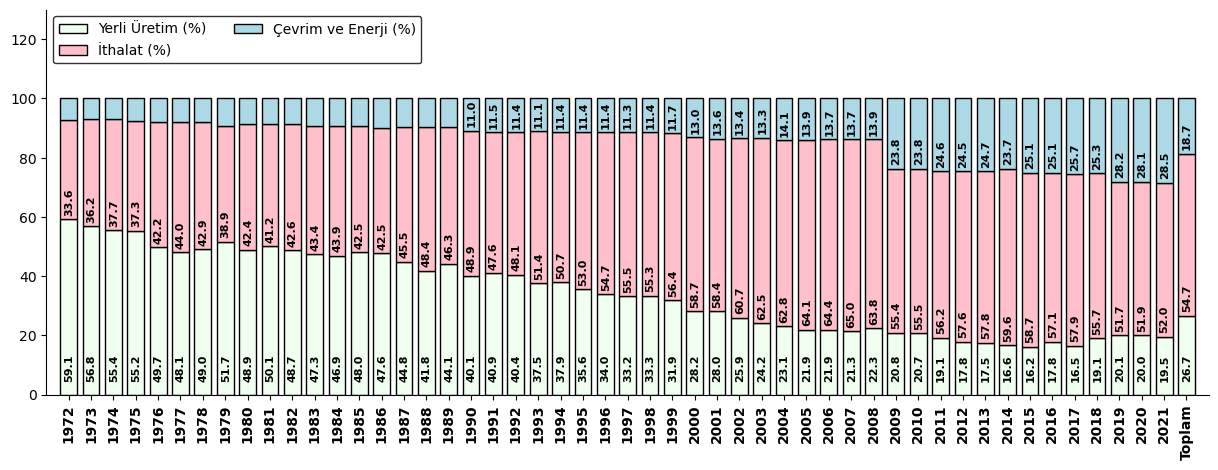

In [43]:
plot(df_toplam_arz)   

### Şekil 12: Toplam Yurt İçi Enerji Üretiminin Enerji Türlerine Göre Dağılımı (1972-2021) 

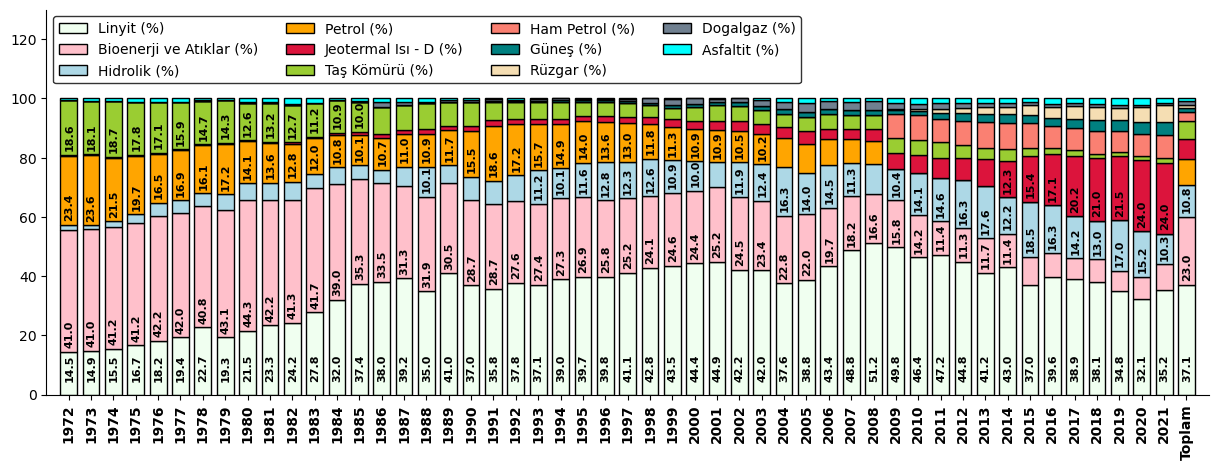

In [44]:
plot(df_yerli_üretim2)

### Şekil 13: Toplam Enerji İthalatın Enerji Türlerine Göre Dağılımı (1972-2021)  

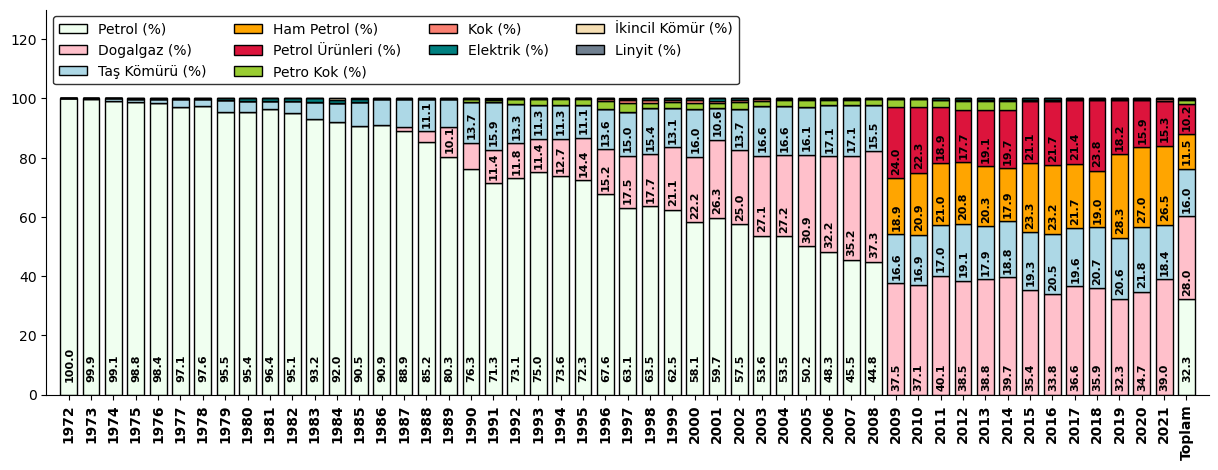

In [45]:
plot(df_ithalat2)

### Şekil 14: Çevrim ve Enerji Sektörü Enerji Türlerine Göre Çıktı Payları (1972-2021) 

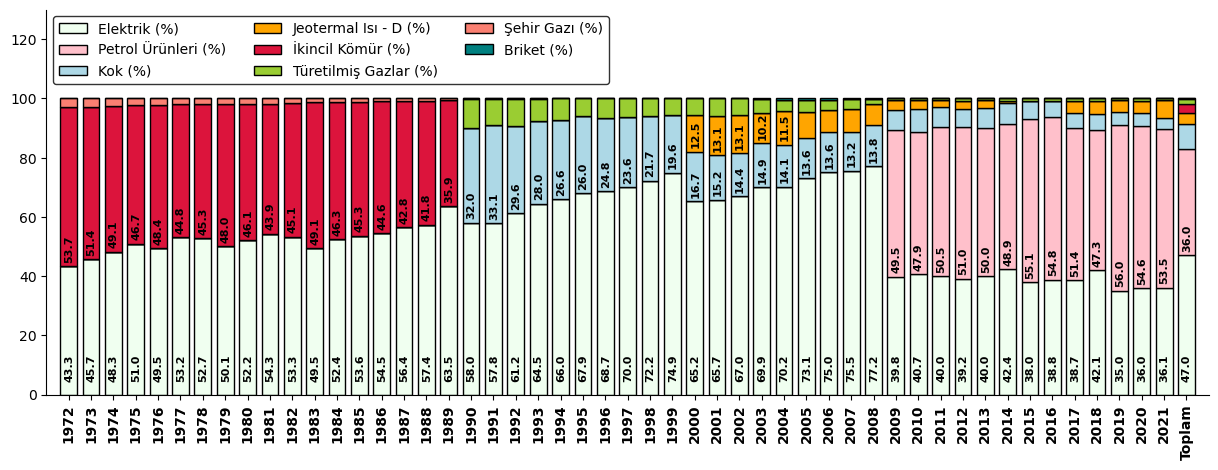

In [46]:
plot(df_CES_arz2)

### Şekil 15: Toplam Enerji Kullanımı (1972 - 2021) (Denklem 16)

In [47]:
df_toplam_kullanım = pd.DataFrame(index = range(1972, 2022),
                           columns = ["Yurtiçi Kullanım", "İhracat", "İhrakiye"])

df_toplam_kullanım["Yurtiçi Kullanım"]  = df_sektörler2["Toplam"].to_numpy()[:-1] + df_CES_kullanım2["Toplam"].to_numpy()[:-1]
df_toplam_kullanım["İhracat"]           = df_ihracat2["Toplam"].to_numpy()[:-1] 
df_toplam_kullanım["İhrakiye"]          = df_ihrakiye2["Toplam"].to_numpy()[:-1] 
df_toplam_kullanım["Toplam"] = np.sum(df_toplam_kullanım, axis = 1)
df_toplam_kullanım.head(2)

,Yurtiçi Kullanım,İhracat,İhrakiye,Toplam
1972,24284.016,922.95,110.25,25317.216
1973,26462.118,856.80,90.30,27409.218


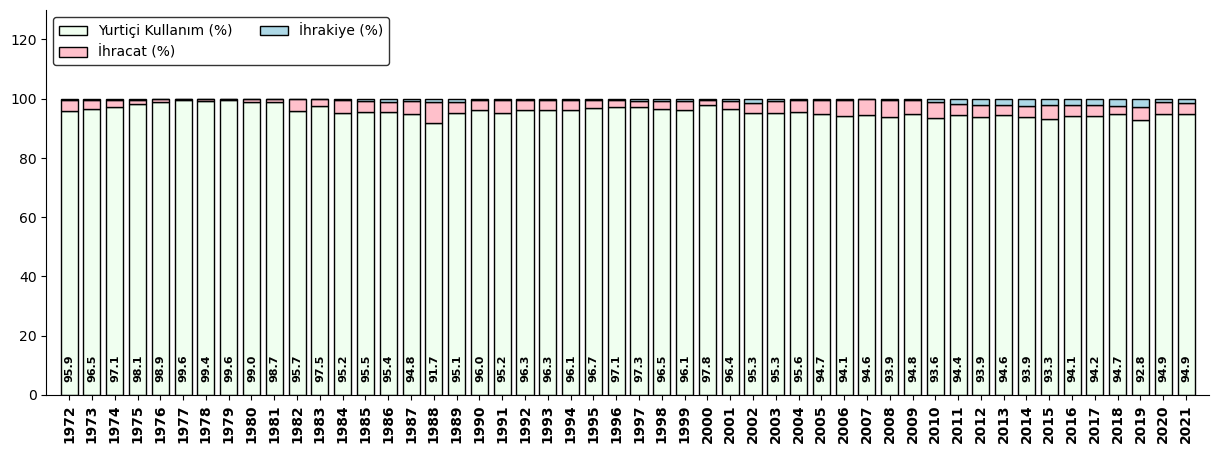

In [48]:
plot(df_toplam_kullanım)

### Şekil 16: Toplam Yurtiçi Enerji Kullanımı (1972 - 2021) (Denklem 17)

In [49]:
df_yurtiçi_kullanım = pd.DataFrame(index = range(1972, 2022),
                           columns = ["Çevrim ve Enerji", "Nihai Birimler"])

df_yurtiçi_kullanım["Çevrim ve Enerji"]  = df_CES_kullanım2["Toplam"].to_numpy()[:-1]
df_yurtiçi_kullanım["Nihai Birimler"]    = df_sektörler2["Toplam"].to_numpy()[:-1] 
df_yurtiçi_kullanım["Toplam"] = np.sum(df_yurtiçi_kullanım, axis = 1)


df_yurtiçi_kullanım.head(2)

,Çevrim ve Enerji,Nihai Birimler,Toplam
1972,4709.834,19574.182,24284.016
1973,5596.608,20865.510,26462.118


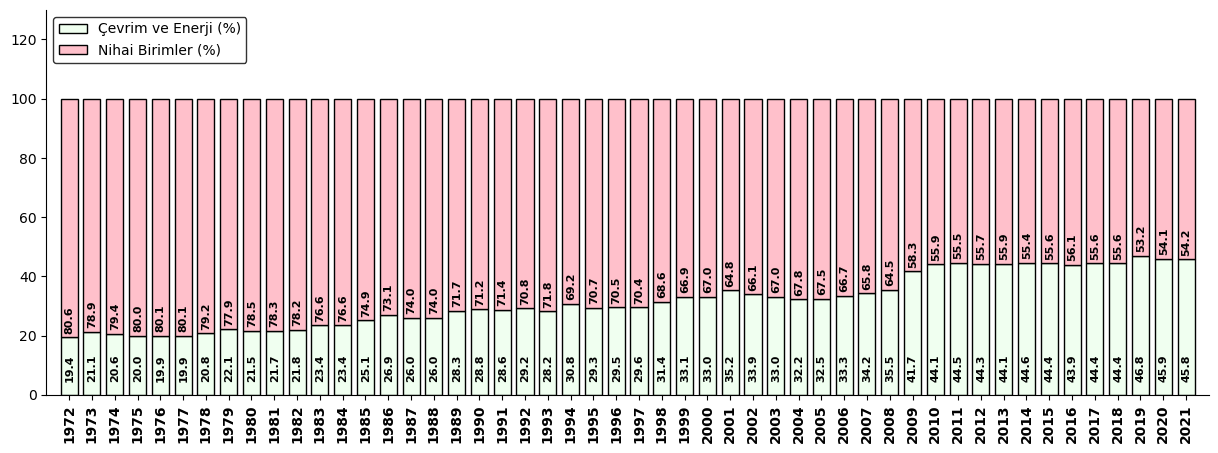

In [50]:
plot(df_yurtiçi_kullanım)

### Şekil 17: ÇES Enerji Kullanımının Enerji Türlerine Göre Dağılımı (1972 - 2021) 

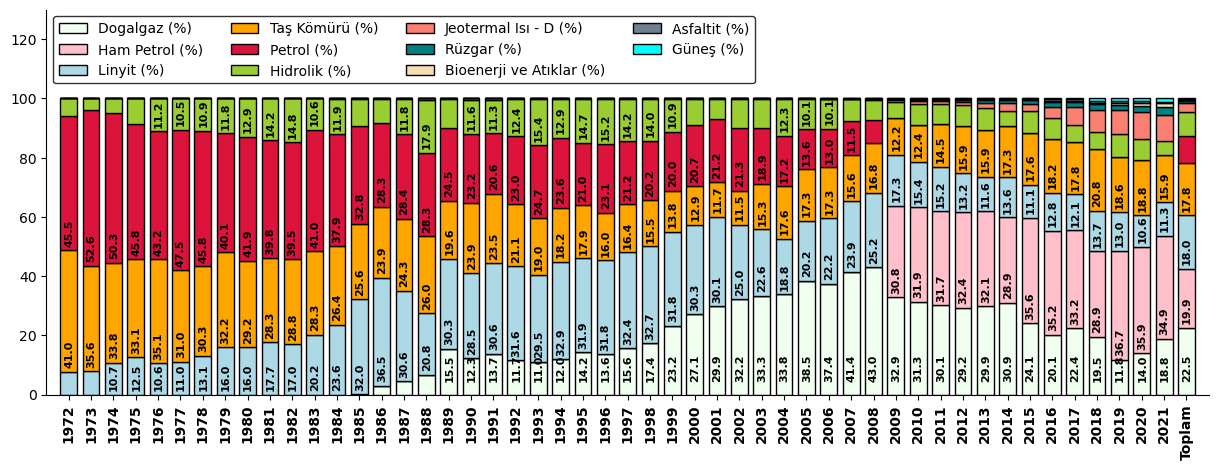

In [51]:
plot(df_CES_kullanım2)

### Şekil 18: Nihai İktisadi Birimlerin Toplam Enerji Kullanımının Dağılımı (1972 - 2021) (Denklem 18)

In [52]:
df_nihai_kullanım = pd.DataFrame(index = range(1972, 2022),
                           columns = ["Sanayi", "Ulaşım","Diğer Sektörler","Enerji Dışı" ])

df_nihai_kullanım["Sanayi"]          = df_sanayi2["Toplam"].to_numpy()[:-1]
df_nihai_kullanım["Ulaşım"]          = df_ulasim2["Toplam"].to_numpy()[:-1] 
df_nihai_kullanım["Diğer Sektörler"] = df_diger_sektör2["Toplam"].to_numpy()[:-1]
df_nihai_kullanım["Enerji Dışı"]     = df_enerji_disi2["Toplam"].to_numpy()[:-1] 

df_nihai_kullanım["Toplam"] = np.sum(df_nihai_kullanım, axis = 1)
df_nihai_kullanım.loc["Toplam"] = np.sum(df_nihai_kullanım)

df_nihai_kullanım.head(2)

,Sanayi,Ulaşım,Diğer Sektörler,Enerji Dışı,Toplam
1972,4799.362,3884.418,10504.002,386.40,19574.182
1973,5185.690,4297.622,10931.748,450.45,20865.510


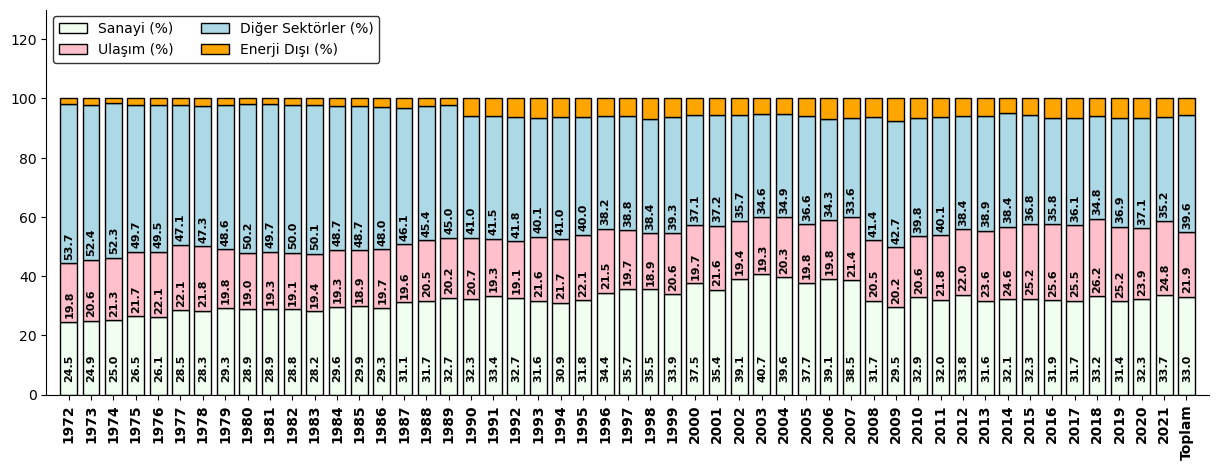

In [53]:
plot(df_nihai_kullanım)

### Şekil 19: Diğer Sektörler Toplam Enerji Kullanımının Dağılımı (1972 - 2021) (Denklem 19)

In [54]:
df_diger = pd.DataFrame(index = range(1972, 2022),
                           columns = ["Konut", "Konut ve Hizmet","Tarım","Ticaret ve Hizmetler", "Tarım ve Hayvancılık" ])

df_diger["Konut"]                  = df_konut2["Toplam"].to_numpy()[:-1]
df_diger["Konut ve Hizmet"]        = df_konut_hizmet2["Toplam"].to_numpy()[:-1] 
df_diger["Tarım"]                  = df_tarim2["Toplam"].to_numpy()[:-1]
df_diger["Ticaret ve Hizmetler"]   = df_tic_hzm2["Toplam"].to_numpy()[:-1] 
df_diger["Tarım ve Hayvancılık"]   = df_tarim_hayv2["Toplam"].to_numpy()[:-1] 

df_diger["Toplam"] = np.sum(df_diger, axis = 1)

df_diger.head(2)

,Konut,Konut ve Hizmet,Tarım,Ticaret ve Hizmetler,Tarım ve Hayvancılık,Toplam
1972,0.0,9787.010,716.992,0.0,0.0,10504.002
1973,0.0,10209.954,721.794,0.0,0.0,10931.748


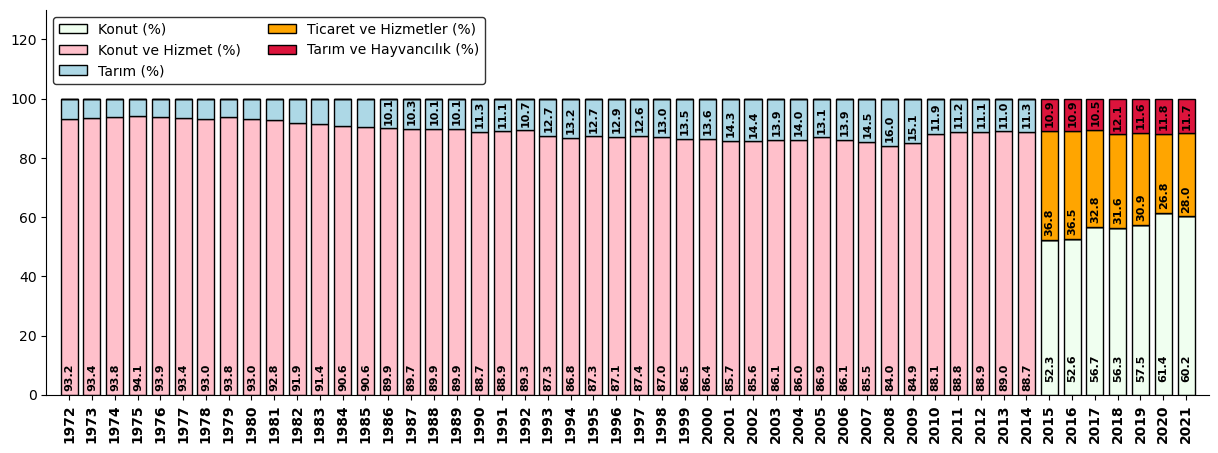

In [55]:
plot(df_diger)

### Şekil 20: Yurtiçi Sektörler Enerji Kullanımının Enerji Türlerine Göre Dağılımı (1972 - 2021) 

In [56]:
df_tum_sektorler = pd.DataFrame(index = range(1972, 2022),
                             columns = ["Çevrim ve Enerji", "Sanayi", "Ulaşım", "Konut", "Konut ve Hizmet","Tarım","Ticaret ve Hizmetler", "Tarım ve Hayvancılık","Enerji Dışı",  ])

df_tum_sektorler["Sanayi"]                 = df_sanayi2["Toplam"].to_numpy()[:-1]
df_tum_sektorler["Ulaşım"]                 = df_ulasim2["Toplam"].to_numpy()[:-1] 
df_tum_sektorler["Konut"]                  = df_konut2["Toplam"].to_numpy()[:-1]
df_tum_sektorler["Konut ve Hizmet"]        = df_konut_hizmet2["Toplam"].to_numpy()[:-1] 
df_tum_sektorler["Tarım"]                  = df_tarim2["Toplam"].to_numpy()[:-1]
df_tum_sektorler["Ticaret ve Hizmetler"]   = df_tic_hzm2["Toplam"].to_numpy()[:-1] 
df_tum_sektorler["Tarım ve Hayvancılık"]   = df_tarim_hayv2["Toplam"].to_numpy()[:-1] 
df_tum_sektorler["Enerji Dışı"]            = df_enerji_disi2["Toplam"].to_numpy()[:-1] 
df_tum_sektorler["Çevrim ve Enerji"]       = df_CES_kullanım2["Toplam"].to_numpy()[:-1]


df_tum_sektorler["Toplam"] = np.sum(df_tum_sektorler, axis = 1)
df_tum_sektorler.loc["Toplam"] = np.sum(df_tum_sektorler)

df_tum_sektorler.head(3)

,Çevrim ve Enerji,Sanayi,Ulaşım,Konut,Konut ve Hizmet,Tarım,Ticaret ve Hizmetler,Tarım ve Hayvancılık,Enerji Dışı,Toplam
1972,4709.834,4799.362,3884.418,0.0,9787.010,716.992,0.0,0.0,386.40,24284.016
1973,5596.608,5185.690,4297.622,0.0,10209.954,721.794,0.0,0.0,450.45,26462.118
1974,5681.126,5461.854,4644.928,0.0,10711.090,708.402,0.0,0.0,320.25,27527.650


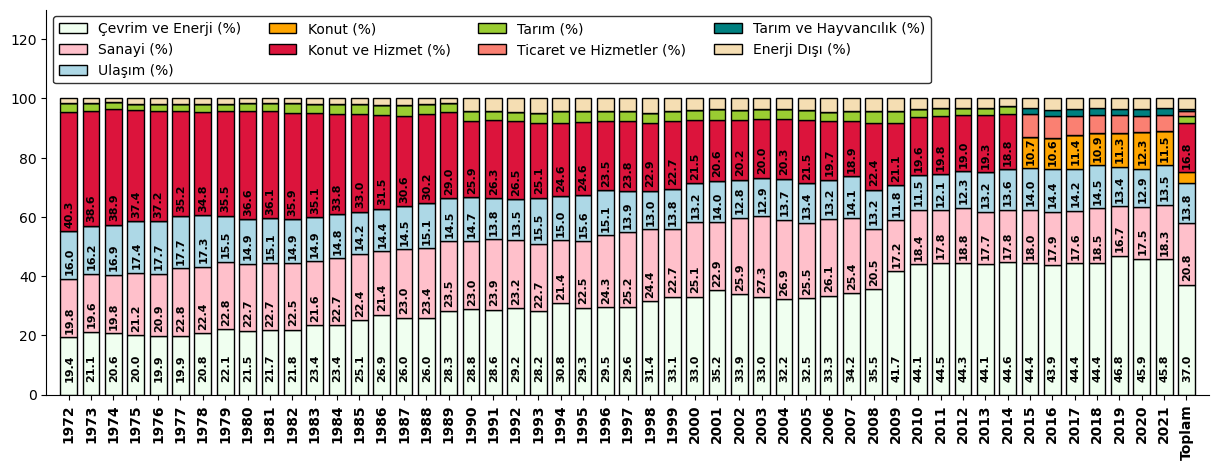

In [57]:
plot(df_tum_sektorler)

### Şekil 21: 2021 Yılı Dünya Ham Petrol Rezerv Dağılımı

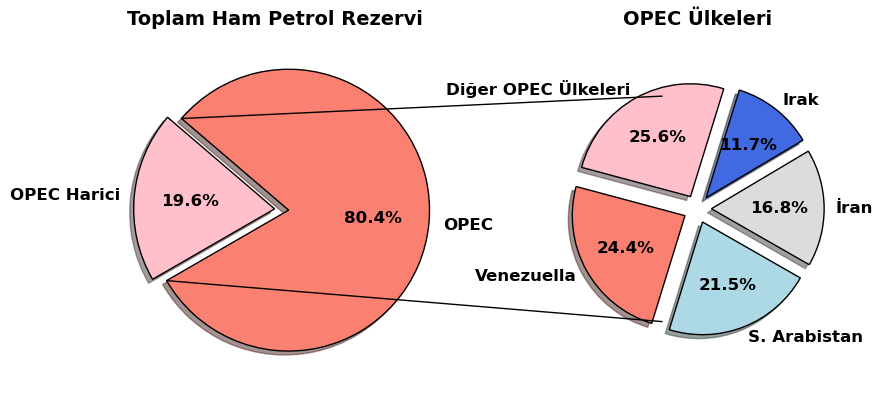

In [58]:
# Kaynak: https://www.opec.org/opec_web/en/data_graphs/330.htm

data = pd.read_excel("Veriler.xlsx", 
                                  sheet_name = "2021 Dünya H.Pet. Rezerv", index_col = "Ülke")

OPEC_toplam = np.sum(data["Rezerv"].to_numpy()[0:-2])
OPEC_Harici = data.loc["OPEC Harici", "Rezerv"]
Toplam = data.loc["Toplam", "Rezerv"]

Venezuella = data.loc["Venezuella", "Rezerv"]
Suudi_Arabistan = data.loc["Suudi Arabistan", "Rezerv"]
İran = data.loc["İran", "Rezerv"]
Irak = data.loc["Irak", "Rezerv"]
DigerOPEC = np.sum(data["Rezerv"].to_numpy()[4:-2])

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,7))

# large pie chart parameters
ratios =[ round(OPEC_toplam / Toplam, 3)*100, 
        round(OPEC_Harici / Toplam,3)*100]

labels = ['OPEC', 'OPEC Harici']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = 210

ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode, shadow = "True", colors = ["salmon", "pink"],
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': '-', 'antialiased': True},
        textprops={'fontsize': 12, "fontweight": "bold"})


# small pie chart parameters
ratios = [round(Venezuella / OPEC_toplam, 3)*100,
         round(Suudi_Arabistan / OPEC_toplam, 3)*100,
         round(İran / OPEC_toplam, 3)*100,
         round(Irak / OPEC_toplam, 3)*100-0.000000000000001, # Düzgün görüzkmesi için...
         round(DigerOPEC / OPEC_toplam,3)*100,]
labels = ['Venezuella', 'S. Arabistan', 'İran', 'Irak', 'Diğer OPEC Ülkeleri']
width = .5
angle2 = 165

ax2.pie(ratios, autopct='%1.1f%%', startangle=angle2,
        labels=labels, radius=0.8,  shadow = "True",
        colors = ["salmon", "lightblue", "gainsboro", "royalblue", "pink"],
        explode = [0.1,0.1,0.1,0.1,0.1],
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': '-', 'antialiased': True},
        textprops={'fontsize': 12, "fontweight": "bold"})


ax1.set_title('Toplam Ham Petrol Rezervi', fontsize = 14, fontweight = "bold")
ax2.set_title('OPEC Ülkeleri', fontsize = 14, fontweight = "bold")

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, .8), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, -.8), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)

con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

plt.show()

In [59]:
31745 / 89876

0.3532088655480885

### Şekil 22: 2020 Yılı Dünya Doğalgaz Rezerv – Üretim – Tüketim Dağılımı

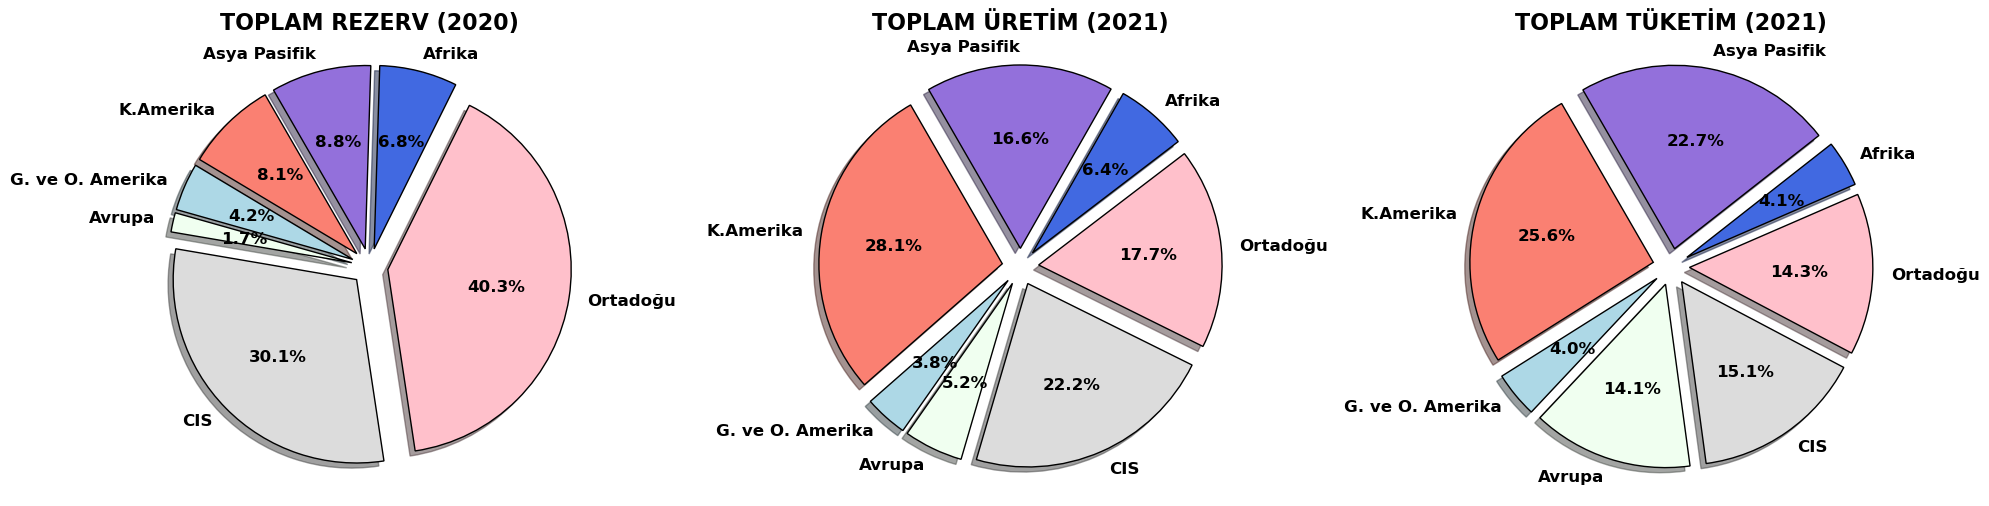

In [60]:
# KAYNAK: BP 2020 ve 2021

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))

# 2020 Rezerv oranları
ratios1 = [8.08, 4.2, 1.7, 30.07, 40.28, 6.85, 8.82]
labels1 = ["K.Amerika", "G. ve O. Amerika", "Avrupa", "CIS", "Ortadoğu", "Afrika", "Asya Pasifik"]
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
colors = ["salmon", "lightblue", "honeydew", "gainsboro", "pink", "royalblue", "mediumpurple"]
angle = 120
ax1.pie(ratios1, autopct='%1.1f%%', startangle=angle,
       labels = labels1, explode = explode, shadow = True,
       textprops={'fontsize': 12, "fontweight": "bold"},
       colors = colors,
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': '-', 'antialiased': True})


# ratios2 = [28.8, 3.97, 5.67, 20.82, 17.82, 6, 16.92] # 2020 Üretim Oranları

production = np.array([1135.8,153.3,210.4, 896.0, 714.9, 257.5, 669.0])
ratios2 = production / production.sum() # 2021 Üretim Oranları

labels2 = ["K.Amerika", "G. ve O. Amerika", "Avrupa", "CIS", "Ortadoğu", "Afrika", "Asya Pasifik"]
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
angle = 120
ax2.pie(ratios2, autopct='%1.1f%%', startangle=angle,
       labels = labels2, explode = explode, shadow = True,
       textprops={'fontsize': 12, "fontweight": "bold"},
       colors = colors,
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': '-', 'antialiased': True},)

# ratios3 = [26.97, 3.81, 14.15, 14.08, 14.45, 4, 22.54] # 2020 Tüketim Oranları
consumption = np.array([1034.1,163.3,571.1,610.8, 575.4, 164.4,  918.3 ])
ratios3 = consumption / consumption.sum() # 2021 Tüketim Oranları

labels3 = ["K.Amerika", "G. ve O. Amerika", "Avrupa", "CIS", "Ortadoğu", "Afrika", "Asya Pasifik"]
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
angle = 120
ax3.pie(ratios3, autopct='%1.1f%%', startangle=angle,
       labels = labels3, explode = explode, shadow = True,
       textprops={'fontsize': 12, "fontweight": "bold"},
       colors = colors,
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': '-', 'antialiased': True})

ax1.set_title('TOPLAM REZERV (2020)', fontweight = "bold", fontsize = 16)
ax2.set_title('TOPLAM ÜRETİM (2021)', fontweight = "bold", fontsize = 16)
ax3.set_title('TOPLAM TÜKETİM (2021)', fontweight = "bold", fontsize = 16)

plt.tight_layout()


# EDT'den Gerekli Verileri Çekilmesi - 2

In [61]:
df_natural_gas = df_edt2.loc[df_edt2["Energy"] == "Doğalgaz"]
df_crude_oil = df_edt2.loc[df_edt2["Energy"] == "Ham Petrol"]
df_pet_pro = df_edt2.loc[df_edt2["Energy"] == "Petrol Ürünleri"]
#----------------------------------------------------------------------------------
df_natural_gas_2 = generate_df2(df_natural_gas).iloc[:, -14:].replace(["-"], 0)
df_crude_oil2    = generate_df2(df_crude_oil).iloc[:, -14:].replace(["-"], 0)
df_pet_pro2      = generate_df2(df_pet_pro).iloc[:, -14:].replace(["-"], 0)

In [65]:
df_natural_gas_2


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Toplam
YERLİ ÜRT.,684.621374,682,760.000000,632.370322,537.000000,479.00,381.00,367.000,354.140000,435.518000,483.000000,457.82600,415.03688,17125.918849
İthalat,35856.475341,38038,43874.450000,45922.188552,45269.000000,49262.00,48427.00,46352.000,55249.950000,50360.580000,45211.470000,48125.51000,58703.93000,905084.987468
İhracat,708.510936,649,714.060000,611.115500,682.000000,633.00,624.00,674.680,630.666234,673.280000,762.680000,577.52000,382.89000,8790.118689
İhrakiye,0.000000,0,0.000000,0.000000,0.000000,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
Stok Değ.,-32.750744,58,759.470000,-684.853139,486.000000,-380.00,-122.43,426.510,-1253.030000,-218.860000,71.790000,243.44000,937.83000,-2481.231725
ÇES,-22438.563152,-23695,-24801.000000,-24941.635287,-25055.806703,-27020.00,-23031.84,-19886.780,-24105.993510,-20525.955029,-13764.500064,-16220.79565,-23668.00219,-467450.120712
Elek. Ürt.,-20483.180000,-21783,-22805.000000,-23090.000000,-22909.746000,-25426.00,-38158.00,-33096.152,-21887.852821,-18219.550809,-11617.000000,-13930.75228,-21083.68000,-466409.288910
Yüksek Fır.,0.000000,0,0.000000,0.000000,0.000000,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
Brik. Fab.,0.000000,0,0.000000,0.000000,0.000000,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
Havagazı,0.000000,0,0.000000,0.000000,0.000000,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000


### Metin içi Ek Tablolar

In [64]:
df_natural_gas_2.replace([0], "-").to_excel("./Metin İçi Tablolar/Ek_Tablo_5.xlsx")
df_crude_oil2.replace([0], "-").to_excel("./Metin İçi Tablolar/Ek_Tablo_6.xlsx")
df_pet_pro2.replace([0], "-").to_excel("./Metin İçi Tablolar/Ek_Tablo_7.xlsx")

### Şekil 25: Ham Petrol Yerli Üretim ve İthalat (2009 – 2021) 

In [ ]:
oil_import_country = pd.read_excel("Veriler.xlsx", 
                                  sheet_name = "İthalat Özel", index_col = "bin ton")

yıllar = np.arange(2009, 2022)
x_axes = np.arange(len(yıllar))
width = 0.75
width2 = 0.4

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,7))

coil_dom    = df_crude_oil2.loc["YERLİ ÜRT."][:-1].to_numpy()
coil_import = df_crude_oil2.loc["İthalat"][:-1].to_numpy()

coil_dom_share = (coil_dom / (coil_dom + coil_import)) * 100
coil_import_share = (coil_import / (coil_dom + coil_import)) * 100


ırak      = (oil_import_country.loc["Irak"].to_numpy()[:-1] / oil_import_country.loc["TOPLAM"].to_numpy()[:-1]) *100
iran      = (oil_import_country.loc["İran"].to_numpy()[:-1] / oil_import_country.loc["TOPLAM"].to_numpy()[:-1]) *100
rusya     = (oil_import_country.loc["Rusya"].to_numpy()[:-1] / oil_import_country.loc["TOPLAM"].to_numpy()[:-1]) *100
arabistan = (oil_import_country.loc["S. Arabistan"].to_numpy()[:-1] / oil_import_country.loc["TOPLAM"].to_numpy()[:-1]) *100
diger     = (oil_import_country.loc["Diğer"].to_numpy()[:-1] / oil_import_country.loc["TOPLAM"].to_numpy()[:-1]) *100


ax1.bar(yıllar, coil_import, width2, edgecolor = "black", color = "Salmon", label = "İthalat")
ax1.bar(yıllar + width2, coil_dom, width2, edgecolor = "black", color = "lightblue", label = "Yerli Üretim" )

ax1.plot(yıllar,(coil_dom + coil_import), "--o", color = "black", label = "Toplam Arz" )

ax2.bar(yıllar, ırak, width, edgecolor = "black", color = "Salmon", label = "Irak")
ax2.bar(yıllar, iran, width, edgecolor = "black", color = "lightblue", label = "İran", bottom = ırak)
ax2.bar(yıllar, rusya, width, edgecolor = "black", color = "darkorange", label = "Rusya", bottom = ırak + iran)
ax2.bar(yıllar, arabistan, width, edgecolor = "black", color = "gainsboro", label = "S. Arabistan", bottom = ırak + iran + rusya)
ax2.bar(yıllar, diger, width, edgecolor = "black", color = "crimson", label = "Diğer Ülkeler", bottom = ırak + iran + rusya + arabistan)


for i in range(len(x_axes)):
    if coil_import_share[i] > 10:
        ax1.text(yıllar[i]-0.05, 2000, "% "+str(round(coil_import_share[i],2)), fontsize = 10, fontweight = "bold", rotation = 90)


for i in range(len(x_axes)):
        ax1.text(yıllar[i]+0.40, 700+coil_dom[i] , "% " + str(round(coil_dom_share[i],2)), fontsize = 10, rotation = 90, fontweight = "bold")


for i in range(len(x_axes)):
    if ırak[i] > 10:
        ax2.text(yıllar[i] - 0.2, 2, str(round(ırak[i],1)), fontsize = 10, fontweight = "bold")

for i in range(len(x_axes)):
    if iran[i] > 10:
        ax2.text(yıllar[i]- 0.2, 2 + ırak[i], str(round(iran[i],1)), fontsize = 10, fontweight = "bold")
        
for i in range(len(x_axes)):
    if rusya[i] > 10:
        ax2.text(yıllar[i]- 0.2, 2 + ırak[i] + iran[i], str(round(rusya[i],1)), fontsize = 10, fontweight = "bold")
        
for i in range(len(x_axes)):
    if arabistan[i] > 10:
        ax2.text(yıllar[i]- 0.2, 2 + ırak[i] + iran[i] + rusya[i], str(round(arabistan[i],1)), fontsize = 10, fontweight = "bold")

for i in range(len(x_axes)):
    if diger[i] > 10:
        ax2.text(yıllar[i]- 0.2, 2 + ırak[i] + iran[i] + rusya[i] + arabistan[i], str(round(diger[i],1)), fontsize = 10, fontweight = "bold")
        

ax1.legend(loc = 2)
ax2.legend(ncol = 5, fontsize = 12, loc = 2, edgecolor = "black") 
ax2.set_ylim(ymax = 130)


ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_xticks(yıllar+0.2);
ax1.set_xticklabels(yıllar,fontweight = "bold")
ax1.set_title("Panel A: Toplam İthalat ve Yerli Üretim (Bin Ton)", fontweight = "bold", fontsize = 13)



ax2.set_xticks(yıllar);
ax2.set_xticklabels(yıllar, fontweight = "bold")
ax2.set_title("Panel B: Toplam İthalat Ülke Payları (%)", fontweight = "bold", fontsize = 13)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.tight_layout()

### Şekil 26: Petrol Ürünleri Rafineri Üretimi ve İthalat (2009 – 2021) 

In [ ]:
df_pet_product = pd.read_excel("Veriler.xlsx", 
                                  sheet_name = "Petrol Ürünleri", index_col = "index")

yıllar = np.arange(2009, 2022)
x_axes = np.arange(len(yıllar))
width = 0.4
width2 = 0.75

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,7))

pet_pro_import   = df_pet_pro2.loc["İthalat"].to_numpy()[:-1]
pet_pro_rafineri = df_pet_pro2.loc["Rafineri"].to_numpy()[:-1]
pet_pro_supply = pet_pro_import + pet_pro_rafineri

pet_pro_import_share   = (pet_pro_import / pet_pro_supply) * 100
pet_pro_rafineri_share = (pet_pro_rafineri / pet_pro_supply) * 100



diger = (df_pet_product.loc["Diğer Ürünler"].to_numpy() / df_pet_product.loc["TOPLAM"].to_numpy()) * 100
motorin = (df_pet_product.loc["Motorin Türleri"].to_numpy() / df_pet_product.loc["TOPLAM"].to_numpy()) * 100
benzin = (df_pet_product.loc["Benzin Türleri"].to_numpy() / df_pet_product.loc["TOPLAM"].to_numpy()) * 100
fuel_oil = (df_pet_product.loc["Fuel Oil Türleri"].to_numpy() / df_pet_product.loc["TOPLAM"].to_numpy()) * 100

ax1.bar(yıllar, pet_pro_import, width, edgecolor = "black" , color = "Salmon", label = "İthalat")
ax1.bar(yıllar+width, pet_pro_rafineri, width,  edgecolor = "black", color = "lightblue", label = "Rafineri Üretimi")
ax1.plot(yıllar, pet_pro_supply, "--o", color = "black", label = "Toplam Arz")


ax2.bar(yıllar, diger, width2, edgecolor = "black", color = "Salmon", label = "Diğer Ürünler")

ax2.bar(yıllar,motorin, width2, edgecolor = "black", color = "lightblue", label = "Motorin Türleri",
       bottom = diger)

ax2.bar(yıllar,benzin, width2, edgecolor = "black", color = "darkorange", label = "Benzin Türleri",
       bottom = diger + motorin )

ax2.bar(yıllar,fuel_oil, width2, edgecolor = "black", color = "gainsboro", label = "Fuel oil Türleri",
       bottom = diger + motorin + benzin )



for i in range(len(x_axes)):
        ax1.text(yıllar[i] - 0.1, 3000, "% " + str(round(pet_pro_import_share[i],1)),
                 fontsize = 10, fontweight = "bold", rotation = 90)
        
for i in range(len(x_axes)):
        ax1.text(yıllar[i] + 0.35, 3000, "% " + str(round(pet_pro_rafineri_share[i],1)),
                 fontsize = 10, fontweight = "bold", rotation = 90)


for i in range(len(x_axes)):
    if diger[i] > 10:
        ax2.text(yıllar[i] - 0.2, 20, str(round(diger[i],1)), fontsize = 10, fontweight = "bold")
        
for i in range(len(x_axes)):
    if motorin[i] > 10:
        ax2.text(yıllar[i] - 0.2, 2 + diger[i], str(round(motorin[i],1)), fontsize = 10, fontweight = "bold") 
        
for i in range(len(x_axes)):
    if benzin[i] > 10:
        ax2.text(yıllar[i] - 0.2, 2 + diger[i] + motorin[i], str(round(benzin[i],1)), fontsize = 10, fontweight = "bold")
        
for i in range(len(x_axes)):
    if fuel_oil[i] > 10:
        ax2.text(yıllar[i] - 0.2, 2 + diger[i] + motorin[i] + benzin[i], str(round(fuel_oil[i],1)), fontsize = 10, fontweight = "bold")  
        

ax1.legend(loc = 2)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_xticks(yıllar+0.2);
ax1.set_xticklabels(yıllar,fontweight = "bold")
ax1.set_title("Panel A: Toplam İthalat ve Rafineri Üretimi (Bin Ton)", fontweight = "bold", fontsize = 13)


ax2.set_ylim(ymax = 130)
ax2.legend(ncol = 4, loc = 2, fontsize = 12, edgecolor = "black")

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_xticks(yıllar);
ax2.set_xticklabels(yıllar,fontweight = "bold")
ax2.set_title("Panel B: Rafineri Üretimi Ürün Payları (%)", fontweight = "bold", fontsize = 13)

plt.tight_layout()

### Şekil 27: Petrol Ürünleri Kullanımı (2009 – 2021)

In [ ]:
yıllar = np.arange(2009, 2022)
x_axes = np.arange(len(yıllar))
width = 0.75

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,7))

elek_uretim = df_pet_pro2.loc["Elek. Ürt."].to_numpy()[:-1]*-1
rafineri    = df_pet_pro2.loc["İç Tüketim ve Kayıp"].to_numpy()[:-1]*-1
sanayi      = df_pet_pro2.loc["SANAYİ"].to_numpy()[:-1]
ulastirma   = df_pet_pro2.loc["ULAŞTIRMA"].to_numpy()[:-1]
kon_hzm     = df_pet_pro2.loc["Kon. Hzm"].to_numpy()[:-1]
konut       = df_pet_pro2.loc["Konut"].to_numpy()[:-1]
tic_hzm     = df_pet_pro2.loc["Tic. Hzm."].to_numpy()[:-1]
tar_hay     = df_pet_pro2.loc["Tar. Hay."].to_numpy()[:-1]
enj_disi    = df_pet_pro2.loc["Enj Dış."].to_numpy()[:-1]

total_use = elek_uretim + rafineri + sanayi + ulastirma + kon_hzm + konut + tic_hzm + tar_hay + enj_disi


elek_uretim_share = (elek_uretim / total_use)*100
rafineri_share    = (rafineri / total_use)*100
sanayi_share      = (sanayi / total_use)*100
ulastirma_share   = (ulastirma / total_use)*100
kon_hzm_share     = (kon_hzm / total_use)*100
konut_share       = (konut / total_use)*100
tic_hzm_share     = (tic_hzm / total_use)*100
tar_hay_share     = (tar_hay / total_use)*100
enj_disi_share    = (enj_disi / total_use)*100


ax1.plot(yıllar, total_use, "--o", color = "darkblue", label = "Toplam Yurtiçi Arz")

ax2.bar(yıllar, ulastirma_share, width, edgecolor = "black", color = "salmon", label = "Ulaştırma")

ax2.bar(yıllar, enj_disi_share, width, edgecolor = "black", color = "lightblue", label = "Enerji Dışı", 
       bottom = ulastirma_share)

ax2.bar(yıllar, tar_hay_share, width, edgecolor = "black", color = "darkorange", label = "Tarım Hayvancılık", 
       bottom = ulastirma_share+enj_disi_share)

ax2.bar(yıllar, sanayi_share, width, edgecolor = "black", color = "gainsboro", label = "Sanayi", 
       bottom = ulastirma_share+enj_disi_share + tar_hay_share)

ax2.bar(yıllar, rafineri_share, width, edgecolor = "black", color = "crimson", label = "İç Tüketim", 
       bottom = ulastirma_share+enj_disi_share + tar_hay_share + sanayi_share)

ax2.bar(yıllar, kon_hzm_share, width, edgecolor = "black", color = "mediumpurple", label = "Konut ve Hizmet", 
       bottom = ulastirma_share+enj_disi_share + tar_hay_share + sanayi_share + rafineri_share)

ax2.bar(yıllar, konut_share, width, edgecolor = "black", color = "pink", label = "Konut", 
       bottom = ulastirma_share+enj_disi_share + tar_hay_share + sanayi_share + rafineri_share + kon_hzm_share)

ax2.bar(yıllar, tic_hzm_share, width, edgecolor = "black", color = "mediumpurple", label = "Ticaret ve Hizmet", 
       bottom = ulastirma_share+enj_disi_share + tar_hay_share + sanayi_share + rafineri_share + kon_hzm_share + konut_share)

ax2.bar(yıllar, elek_uretim_share, width, edgecolor = "black", color = "darkblue", label = "Elektrik Üretimi", 
       bottom = ulastirma_share+enj_disi_share + tar_hay_share + sanayi_share + rafineri_share + kon_hzm_share + konut_share + tic_hzm_share)




for i in range(len(x_axes)):
    if ulastirma_share[i] > 10:
        ax2.text(yıllar[i] - 0.28, 20, str(round(ulastirma_share[i],1)), fontsize = 10, fontweight = "bold")
        

for i in range(len(x_axes)):
    if enj_disi_share[i] > 10:
        ax2.text(yıllar[i] - 0.28, 2 + ulastirma_share[i],
                 str(round(enj_disi_share[i],1)), fontsize = 10, fontweight = "bold")


for i in range(len(x_axes)):
    if tar_hay_share[i] > 10:
        ax2.text(yıllar[i] - 0.28, 2 + ulastirma_share[i] + enj_disi_share[i],
                 str(round(tar_hay_share[i],1)), fontsize = 10, fontweight = "bold")
        
for i in range(len(x_axes)):
    if sanayi_share[i] > 10:
        ax2.text(yıllar[i] - 0.28, 2 + ulastirma_share[i] + enj_disi_share[i] + tar_hay_share[i] ,
                 str(round(sanayi_share[i],1)), fontsize = 10, fontweight = "bold")

ax1.legend(loc = 2)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_title("Toplam Arz (Bin Ton)", fontweight = "bold", fontsize = 13)


ax2.set_ylim(ymax = 130)
ax2.legend(ncol = 5, loc = 2, fontsize = 9, edgecolor = "black")

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_xticks(yıllar);
ax2.set_xticklabels(yıllar,fontweight = "bold")
ax2.set_title("Toplam Yurtiçi Kullanım Sektör Payları (%)", fontweight = "bold", fontsize = 13)

plt.tight_layout()

### Şekil 28: Doğalgaz Yerli Üretim (2009 – 2021) 

In [ ]:
df_dgaz_uretim = pd.read_excel("Veriler.xlsx", 
                                  sheet_name = "Dogalgaz Üretim", index_col = "index")

df_dgaz_uretim["DİĞER"] = np.sum(df_dgaz_uretim.iloc[:, 2:], axis = 1)
for i in df_dgaz_uretim.columns[2:-1]:
    del df_dgaz_uretim[i]
    
df_dgaz_uretim["Toplam"] = np.sum(df_dgaz_uretim, axis = 1)
df_dgaz_uretim.loc["Toplam"] = np.sum(df_dgaz_uretim)
df_dgaz_uretim


#-------------------------------------------------------
yıllar2 = df_dgaz_uretim.index[:-1]
x_axes2 = np.arange(len(yıllar2))
width = 0.75

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,7))


total_dom = df_natural_gas_2.loc["YERLİ ÜRT."][:-1]

TPOA  = (df_dgaz_uretim["TPOA"].to_numpy()[:-1] /  df_dgaz_uretim["Toplam"].to_numpy()[:-1]) * 100
TB    = (df_dgaz_uretim["Thrace Basin"].to_numpy()[:-1] /  df_dgaz_uretim["Toplam"].to_numpy()[:-1]) * 100
diğer = (df_dgaz_uretim["DİĞER"].to_numpy()[:-1] /  df_dgaz_uretim["Toplam"].to_numpy()[:-1]) * 100



ax1.plot(df_natural_gas_2.columns[:-1], total_dom, "--o", color = "darkblue", label = "Toplam Yerli Üretim")

ax2.bar(x_axes2, TPOA, width, edgecolor = "black", color = "Salmon", label = "TPAO")

ax2.bar(x_axes2, TB, width, edgecolor = "black", color = "lightblue", label = "Thrace Basin",
       bottom = TPOA)

ax2.bar(x_axes2, diğer, width, edgecolor = "black", color = "pink", label = "Diğer Firmalar",
       bottom = TPOA + TB)


for i in range(len(x_axes2)):
    if TPOA[i] > 10:
        ax2.text(i-0.2, 20, str(round(TPOA[i],1)), fontsize = 9, fontweight = "bold")
        
for i in range(len(x_axes2)):
    if TB[i] > 10:
        ax2.text(i-0.2, 2 + TPOA[i], str(round(TB[i],1)), fontsize = 9, fontweight = "bold")

for i in range(len(x_axes2)):
    if diğer[i] > 10:
        ax2.text(i-0.2, 2 + TPOA[i] + TB[i], str(round(diğer[i],1)), fontsize = 9, fontweight = "bold")
        
ax1.legend(loc = 1)
ax2.legend(ncol = 3, fontsize = 11, loc = 2) 
ax2.set_ylim(ymax = 130)


ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_title("Panel A: Toplam Yerli Üretim ($10^6Sm^3$)", fontweight = "bold", fontsize = 13)

ax2.set_xticks(x_axes2);
ax2.set_xticklabels(yıllar2, fontweight = "bold")
ax2.set_title("Panel B: Toplam Yerli Üretim Firma Payları (%)", fontweight = "bold", fontsize = 13)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.tight_layout()

## Şekil 29: Doğalgaz İthalatı (2009 – 2021)

In [ ]:
df_dgaz_ithalat = pd.read_excel("Veriler.xlsx", 
                                  sheet_name = "Dogalgaz İthalat", index_col = "index")


yıllar = df_dgaz_ithalat.index[:-1]
x_axes = np.arange(len(yıllar))
width = 0.75

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,7))


total_import = df_natural_gas_2.loc["İthalat"][:-1]

rusya      = (df_dgaz_ithalat["Rusya"].to_numpy()[:-1] /  df_dgaz_ithalat["Toplam"].to_numpy()[:-1]) * 100
iran       = (df_dgaz_ithalat["İran"].to_numpy()[:-1] /  df_dgaz_ithalat["Toplam"].to_numpy()[:-1]) * 100
azerbaycan = (df_dgaz_ithalat["Azerbaycan"].to_numpy()[:-1] /  df_dgaz_ithalat["Toplam"].to_numpy()[:-1]) * 100
cezayir    = (df_dgaz_ithalat["Cezayir"].to_numpy()[:-1] /  df_dgaz_ithalat["Toplam"].to_numpy()[:-1]) * 100
nijerya    = (df_dgaz_ithalat["Nijerya"].to_numpy()[:-1] /  df_dgaz_ithalat["Toplam"].to_numpy()[:-1]) * 100
spot       = (df_dgaz_ithalat["Spot"].to_numpy()[:-1] /  df_dgaz_ithalat["Toplam"].to_numpy()[:-1]) * 100


ax1.plot(df_natural_gas_2.columns[:-1], total_import, "--o", color = "darkblue", label = "Toplam İthalat")

ax2.bar(x_axes, rusya, width, edgecolor = "black", color = "Salmon", label = "Rusya")
ax2.bar(x_axes, iran, width, edgecolor = "black", color = "lightblue", label = "İran",
       bottom = rusya)
ax2.bar(x_axes, azerbaycan, width, edgecolor = "black", color = "pink", label = "Azerbaycan",
       bottom = rusya + iran)
ax2.bar(x_axes, cezayir, width, edgecolor = "black", color = "gainsboro", label = "Cezayir",
       bottom = rusya + iran + azerbaycan)

ax2.bar(x_axes, nijerya, width, edgecolor = "black", color = "crimson", label = "Nijerya",
       bottom = rusya + iran + azerbaycan + cezayir)

ax2.bar(x_axes, spot, width, edgecolor = "black", color = "mediumpurple", label = "Spot",
       bottom = rusya + iran + azerbaycan + cezayir + nijerya)

for i in range(len(x_axes)):
    if rusya[i] > 10:
        ax2.text(i-0.2, 20, str(round(rusya[i],1)), fontsize = 9, fontweight = "bold")
        
for i in range(len(x_axes)):
    if iran[i] > 10:
        ax2.text(i-0.2, 2 + rusya[i], str(round(iran[i],1)), fontsize = 9, fontweight = "bold")

for i in range(len(x_axes)):
    if azerbaycan[i] > 10:
        ax2.text(i-0.2, 2 + rusya[i] + iran[i], str(round(azerbaycan[i],1)), fontsize = 9, fontweight = "bold")
        
for i in range(len(x_axes)):
    if cezayir[i] > 10:
        ax2.text(i-0.2, 2 + rusya[i] + iran[i] + azerbaycan[i], str(round(cezayir[i],1)), fontsize = 9, fontweight = "bold")
        
for i in range(len(x_axes)):
    if spot[i] > 10:
        ax2.text(i-0.2, 2 + rusya[i] + iran[i] + azerbaycan[i] + cezayir[i] + nijerya[i],
                 str(round(spot[i],1)), fontsize = 8, fontweight = "bold")
    
ax1.legend(loc = 2)
ax2.legend(ncol = 6, fontsize = 11, loc = 2) 
ax2.set_ylim(ymax = 130)


ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_title("Panel A: Toplam İthalat ($10^6Sm^3$)", fontweight = "bold", fontsize = 13)

ax2.set_xticks(x_axes);
ax2.set_xticklabels(yıllar, fontweight = "bold")
ax2.set_title("Panel B: Toplam İthalat Ülke Payları (%)", fontweight = "bold", fontsize = 13)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.tight_layout()

### Şekil 30: Yurtiçi Doğalgaz Kullanımı (2009 – 2020)

In [ ]:
yıllar = range(2009, 2022)
x_axes = np.arange(len(yıllar))
width = 0.75

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,7))


total_supply = df_natural_gas_2.loc["YERLİ ÜRT."][:-1].to_numpy() + df_natural_gas_2.loc["İthalat"][:-1].to_numpy() - df_natural_gas_2.loc["İhracat"][:-1].to_numpy() + df_natural_gas_2.loc["Stok Değ."][:-1].to_numpy()

ces        = (df_natural_gas_2.loc["ÇES"].to_numpy()[:-1] /  total_supply) * -100

sanayi     = (df_natural_gas_2.loc["SANAYİ"].to_numpy()[:-1] /  total_supply) * 100

konhzm     = (df_natural_gas_2.loc["Kon. Hzm"].to_numpy()[:-1] /  total_supply) * 100

konut      = (df_natural_gas_2.loc["Konut"].to_numpy()[:-1] /  total_supply) * 100

tichzm     = (df_natural_gas_2.loc["Tic. Hzm."].to_numpy()[:-1] /  total_supply) * 100

enjdisi    = (df_natural_gas_2.loc["Enj Dış."].to_numpy()[:-1] /  total_supply) * 100
ulasim     = (df_natural_gas_2.loc["ULAŞTIRMA"].to_numpy()[:-1] /  total_supply) * 100
tarım      = (df_natural_gas_2.loc["Tar. Hay."].to_numpy()[:-1] /  total_supply) * 100

diger = enjdisi + ulasim + tarım


ax1.plot(range(2009,2022), total_supply, "--o", color = "darkblue", label = "Toplam Yurtiçi Arz")

ax2.bar(x_axes, ces, width, edgecolor = "black", color = "Salmon", label = "Çevrim ve Enerji")

ax2.bar(x_axes, sanayi, width, edgecolor = "black", color = "royalblue", label = "Sanayi",
       bottom = ces)

ax2.bar(x_axes, konhzm, width, edgecolor = "black", color = "honeydew", label = "Konut ve Hizmet",
       bottom = ces + sanayi)

ax2.bar(x_axes, konut, width, edgecolor = "black", color = "crimson", label = "Konut",
       bottom = ces + sanayi + konhzm)

ax2.bar(x_axes, tichzm, width, edgecolor = "black", color = "darkorange", label = "Ticaret ve Hizmet",
       bottom = ces + sanayi + konhzm + konut)

ax2.bar(x_axes, diger, width, edgecolor = "black", color = "lightblue", label = "Diğer",
       bottom = ces + sanayi + konhzm + konut + tichzm)



for i in range(len(x_axes)):
    if ces[i] > 10:
        ax2.text(i-0.2, 20, str(round(ces[i],1)), fontsize = 10, fontweight = "bold")
        
        
for i in range(len(x_axes)):
    if sanayi[i] > 10:
        ax2.text(i-0.2, 2 + ces[i], str(round(sanayi[i],1)), fontsize = 10, fontweight = "bold")
        
for i in range(len(x_axes)):
    if konhzm[i] > 10:
        ax2.text(i-0.2, 2 + ces[i] + sanayi[i], str(round(konhzm[i],1)), fontsize = 10, fontweight = "bold")
        
        
for i in range(len(x_axes)):
    if konut[i] > 10:
        ax2.text(i-0.2, 2 + ces[i] + sanayi[i] + konhzm[i], str(round(konut[i],1)), fontsize = 10, fontweight = "bold")
        
        
for i in range(len(x_axes)):
    if tichzm[i] > 10:
        ax2.text(i-0.2, 2 + ces[i] + sanayi[i] + konhzm[i] + konut[i], str(round(tichzm[i],1)), fontsize = 10, fontweight = "bold")


        
        
ax1.legend(loc = 2)
ax2.legend(ncol = 3, fontsize = 9, loc = 2, edgecolor = "black") 
ax2.set_ylim(ymax = 130)


ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_title("Panel A: Toplam Arz ($10^6Sm^3$)", fontweight = "bold", fontsize = 13)

ax2.set_xticks(x_axes);
ax2.set_xticklabels(yıllar, fontweight = "bold")
ax2.set_title("Panel B: Toplam Yurtiçi Kullanım  Sektör Payları(%)", fontweight = "bold", fontsize = 13)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.tight_layout()